O Banco de Dados escolhido foi o Automobile Dataset

Descrição dos dados: informações sobre a quantidade de instâncias, variáveis e seus tipos, quantidade de valores faltantes, etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Informações sobre os dados

In [3]:
car_dados = pd.read_csv("Automobile_data.csv",sep=",")
car_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Lista de Carros com pelo menos um dado Faltante

In [4]:
marca = car_dados[car_dados[list(car_dados)[1]]=="?"][[list(car_dados)[1],list(car_dados)[2]]]

Remove duplicatas

In [5]:
lista=set(marca[marca.columns[1]])

Gera uma lista de colunas das marcas que possuem valores faltantes

In [6]:
i=[0]
colunas=[]
for i in range(len(car_dados.columns)):
    if "?" in list(car_dados[car_dados.columns[i]]):
       colunas.append(car_dados.columns[i])
    
        #colunas[i] =  car_dados.columns[i]
colunas

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

Ordena em ordem alfabetica das marcas dos carros e exibe as tabelas necessárias

In [7]:
for i in range(len(colunas)):
    tabela = pd.DataFrame(car_dados[car_dados[colunas[i]]=="?"][[list(car_dados)[2],colunas[i]]].value_counts())
    print(tabela.sort_index())

                                 0
make          normalized-losses   
alfa-romero   ?                  3
audi          ?                  3
bmw           ?                  4
isuzu         ?                  4
jaguar        ?                  2
mazda         ?                  2
mercedes-benz ?                  3
mercury       ?                  1
mitsubishi    ?                  3
peugot        ?                  4
plymouth      ?                  1
porsche       ?                  4
renault       ?                  2
toyota        ?                  1
volkswagen    ?                  4
                    0
make  num-of-doors   
dodge ?             1
mazda ?             1
            0
make  bore   
mazda ?     4
              0
make  stroke   
mazda ?       4
                    0
make    horsepower   
renault ?           2
                  0
make    peak-rpm   
renault ?         2
               0
make    price   
audi    ?      1
isuzu   ?      2
porsche ?      1


Quantidades de dados faltantes nas respectivas colunas

In [8]:
i=[0]
DADOS_FALTANTES = []
for i in range(len(car_dados.columns)):
    DADOS_FALTANTES.append(len(car_dados[car_dados[car_dados.columns[i]]=="?"]))
    
DADOS_FALTANTES

[0, 41, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 2, 2, 0, 0, 4]

DataFrame das colunas e seus dados faltantes

In [9]:
Col_Dad_Falt = pd.DataFrame({'Colunas': list(car_dados.columns),'Dados Faltantes': DADOS_FALTANTES})
Col_Dad_Falt

,Colunas,Dados Faltantes
0,symboling,0
1,normalized-losses,41
2,make,0
3,fuel-type,0
4,aspiration,0
5,num-of-doors,2
6,body-style,0
7,drive-wheels,0
8,engine-location,0
9,wheel-base,0


Total de dados faltantes

In [10]:
sum(DADOS_FALTANTES)

59

Perguntas de partidas e hipóteses: que tipo de informações podem ser obtidas a partir dos dados e quais hipóteses podem ser levantadas?

Existe relação entre tamanho do motor e Consumo do Combustíbel?

Gerando os gráficos de Correlação entre eles

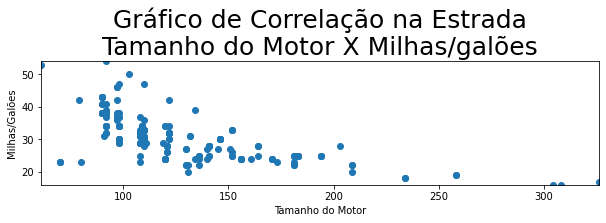

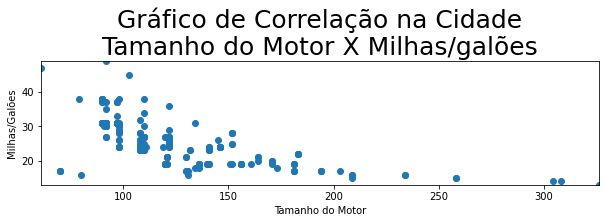

In [11]:
fig = plt.figure(figsize=(10,5))#Na Estrada
plt.subplot(2,1,1)
#plt.plot(x, y)
plt.scatter(car_dados[car_dados.columns[16]],car_dados[car_dados.columns[24]])
plt.title("Gráfico de Correlação na Estrada\nTamanho do Motor X Milhas/galões",fontsize=25)
plt.xlabel("Tamanho do Motor",fontsize=10)
plt.ylabel("Milhas/Galões",fontsize=10)
plt.xlim(min(car_dados[car_dados.columns[16]]),max(car_dados[car_dados.columns[16]]))
plt.ylim(min(car_dados[car_dados.columns[24]]),max(car_dados[car_dados.columns[24]]))

car_dados1=car_dados.sort_values(by=car_dados.columns[25])
fig = plt.figure(figsize=(10,5))#Na Cidade
#plt.plot(x, y)
plt.subplot(2,1,2)
plt.scatter(car_dados1[car_dados1.columns[16]],car_dados1[car_dados1.columns[23]])
plt.title("Gráfico de Correlação na Cidade\nTamanho do Motor X Milhas/galões",fontsize=25)
plt.xlabel("Tamanho do Motor",fontsize=10)
plt.ylabel("Milhas/Galões",fontsize=10)
plt.xlim(min(car_dados1[car_dados1.columns[16]]),max(car_dados1[car_dados1.columns[16]]))
plt.ylim(min(car_dados1[car_dados1.columns[23]]),max(car_dados1[car_dados1.columns[23]]))
plt.show()

Gerando gráfico Único de Correlação entre eles

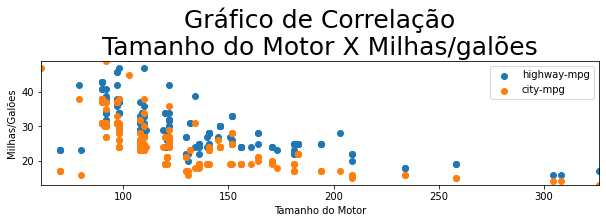

In [12]:
fig = plt.figure(figsize=(10,5))#Na Estrada
plt.subplot(2,1,1)
plt.scatter(car_dados[car_dados.columns[16]],car_dados[car_dados.columns[24]])
plt.title("Gráfico de Correlação\nTamanho do Motor X Milhas/galões",fontsize=25)
plt.xlabel("Tamanho do Motor",fontsize=10)
plt.ylabel("Milhas/Galões",fontsize=10)
plt.xlim(min(car_dados[car_dados.columns[16]]),max(car_dados[car_dados.columns[16]]))
plt.ylim(min(car_dados[car_dados.columns[24]]),max(car_dados[car_dados.columns[24]]))

car_dados1=car_dados.sort_values(by=car_dados.columns[25])
plt.scatter(car_dados1[car_dados1.columns[16]],car_dados1[car_dados1.columns[23]])
plt.title("Gráfico de Correlação\nTamanho do Motor X Milhas/galões",fontsize=25)
plt.xlabel("Tamanho do Motor",fontsize=10)
plt.ylabel("Milhas/Galões",fontsize=10)
plt.legend([list(car_dados.columns)[24],list(car_dados.columns)[23]])
plt.xlim(min(car_dados1[car_dados1.columns[16]]),max(car_dados1[car_dados1.columns[16]]))
plt.ylim(min(car_dados1[car_dados1.columns[23]]),max(car_dados1[car_dados1.columns[23]]))
plt.show()

Insights: respostas às perguntas feitas na seção anterior e quais informações interessantes podem ser levantadas através dos dados?

R: Não se pode afirmar se há correlação significativa entre tamanho do motor e o consumo de combustível, pois seria necessário um estudo mais aprofundado devido a influência do tamanho do corpo e o tipo de combustível de cada veículo e com isso geraria mais gastos em tempo e recursos financeiros.